In [64]:
import pandas as pd
import numpy as np

In [65]:
train_final = pd.read_csv('train_final.csv')  
test_final = pd.read_csv('test_final.csv')  
test_label_file = pd.read_csv('predictions.csv') 
test_final['Y'] = test_label_file['Y']



I used pseudo labeling to further enhance the score of the model. I tried two type of pseudo labeling

1. one where I used the entire test predictions by converting predictions above or equal to 0.5 as 1 and the ones below 0.5 as 0.
2. Confident predictions only : Second type of pseudo labeling took into account the confidence of the model predictions. I used only the predictions where the model was very confident . for this I used only the prediction rows where the model was
Either 70% or more sure that the data point belongs to category 1
Or 30% or lesser sure that the data point belongs to category 0 (this can be interpreted as 70% or more confident that the data point belongs to class 0)

Keeping the confident predictions only further enhanced the AUC value.


In [66]:
indexNames = test_final[(test_final['Y']>0.3) & (test_final['Y']<0.7)].index
#test_final.drop(indexNames, inplace=True)
test_label = test_final['Y']
test_label[test_label>=0.5] = int(1)
test_label[test_label<0.5] = int(0)
test_final['Y'] = test_label
# Delete these row indexes from dataFrame
indexNames.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(110,)

In [ ]:
indexNames.shape

(110,)

EDA : Feature f13 and f19 have alinear relationship, they have same value for most of the points. This gave me intuituion that probably only one of them is actually the correct feture and the other one is probably a polluted verion of the correct feature.

*This made me experiment with the model by training only with one of the two features at a time (this did not improve the AUC value, so the intuition might be wrong.) *

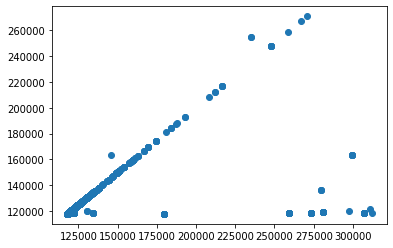

In [67]:
# EDA
import matplotlib.pyplot as plt
plt.scatter(train_final['f19'], train_final['f13'])

count    16383.000000
mean      8192.000000
std       4729.509065
min          1.000000
25%       4096.500000
50%       8192.000000
75%      12287.500000
max      16383.000000
Name: Id, dtype: float64
2047     1
10912    1
693      1
2740     1
12979    1
        ..
15693    1
13644    1
3403     1
1354     1
2049     1
Name: Id, Length: 16383, dtype: int64


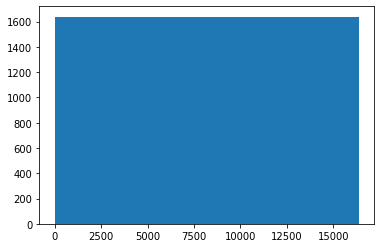

count    16383.000000
mean         0.942135
std          0.233495
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64
1    15435
0      948
Name: Y, dtype: int64


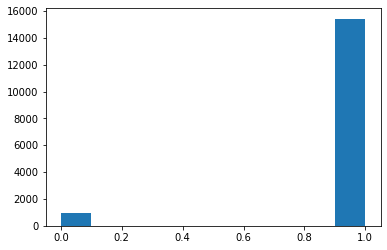

count     16383.000000
mean      43007.775865
std       33611.182771
min          -1.000000
25%       20311.000000
50%       35527.000000
75%       74240.500000
max      312152.000000
Name: f1, dtype: float64
4674      431
79091     240
75077     205
25992     199
3852      184
         ... 
103510      1
74832       1
27721       1
1092        1
6155        1
Name: f1, Length: 5170, dtype: int64


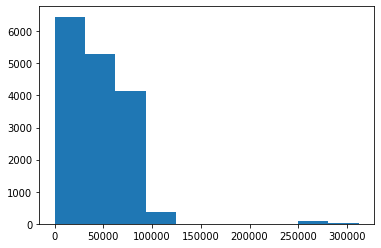

count    16383.000000
mean         1.044375
std          0.264806
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: f2, dtype: float64
1    15807
2      479
3       60
4       24
5       10
6        2
7        1
Name: f2, dtype: int64


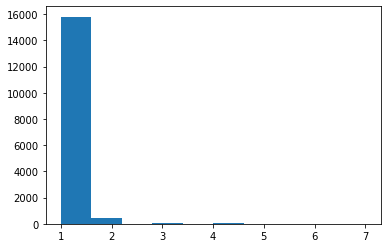

count    16383.000000
mean        11.770938
std        353.187115
min          1.770000
25%          1.770000
50%          1.770000
75%          3.540000
max      43910.160000
Name: f3, dtype: float64
1.77       10031
3.54        2466
5.31        1053
7.08         596
8.85         411
           ...  
1007.13        1
297.36         1
228.33         1
283.20         1
479.67         1
Name: f3, Length: 168, dtype: int64


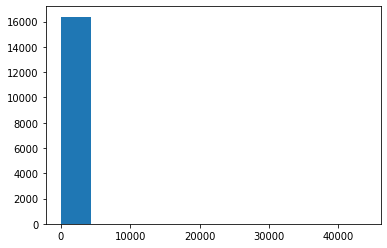

count     16383.000000
mean     118323.581456
std        4518.059755
min       23779.000000
25%      118096.000000
50%      118300.000000
75%      118386.000000
max      286791.000000
Name: f4, dtype: float64
118300    2213
118343    2002
118327    1329
118225    1282
118386     895
          ... 
121602       1
123999       1
286791       1
185842       1
143009       1
Name: f4, Length: 162, dtype: int64


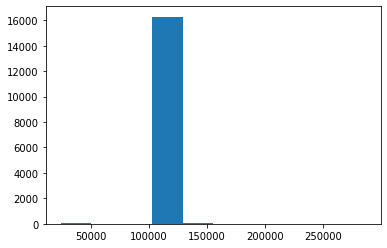

count    16383.000000
mean         1.044436
std          0.265601
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: f5, dtype: float64
1    15795
2      499
3       60
4       16
5        9
7        2
6        1
9        1
Name: f5, dtype: int64


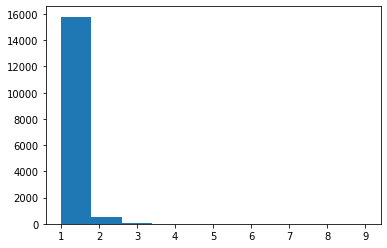

count    16383.000000
mean         0.050052
std          0.293892
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: f6, dtype: float64
0     15745
1       522
2        80
3        24
5         6
4         3
6         1
10        1
8         1
Name: f6, dtype: int64


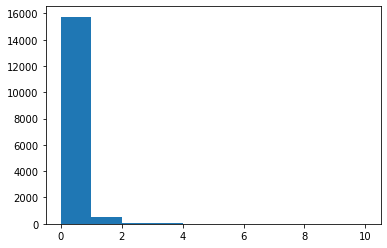

count     16383.000000
mean     117089.674113
std       10261.292970
min        4292.000000
25%      117961.000000
50%      117961.000000
75%      117961.000000
max      311178.000000
Name: f7, dtype: float64
117961    10756
117902      368
91261       358
118315      254
119062      195
          ...  
209434        1
143008        1
192441        1
119615        1
127616        1
Name: f7, Length: 118, dtype: int64


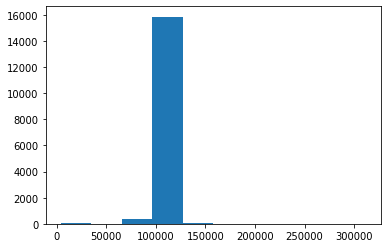

count     16383.000000
mean     169730.178600
std       69396.677853
min        4673.000000
25%      117906.000000
50%      128130.000000
75%      234498.500000
max      311867.000000
Name: f8, dtype: float64
117906    3509
240983     618
279443     332
117913     329
117886     287
          ... 
308168       1
123850       1
155386       1
188138       1
235305       1
Name: f8, Length: 1851, dtype: int64


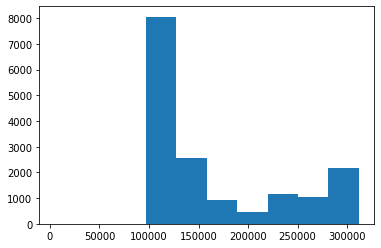

count    16383.000000
mean         1.041812
std          0.258226
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: f9, dtype: float64
1     15839
2       441
3        80
4        16
5         5
7         1
11        1
Name: f9, dtype: int64


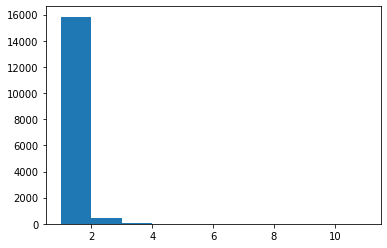

count    16383.000000
mean         4.976317
std         65.629620
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       5036.000000
Name: f10, dtype: float64
0      9965
1      2479
2      1089
3       625
4       381
       ... 
412       1
420       1
500       1
524       1
363       1
Name: f10, Length: 182, dtype: int64


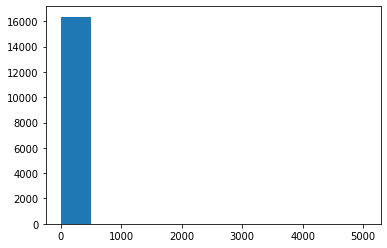

count    16383.000000
mean         1.042483
std          0.254664
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: f11, dtype: float64
1    15816
2      483
3       54
4       21
5        5
6        3
8        1
Name: f11, dtype: int64


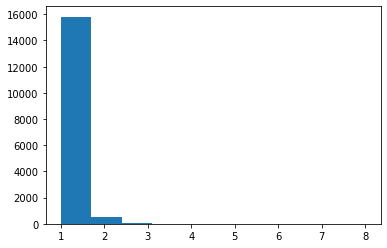

count    16383.000000
mean         6.378380
std        108.216528
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      10076.000000
Name: f12, dtype: float64
1      10038
2       2496
3       1095
4        654
5        390
       ...  
92         1
116        1
124        1
156        1
179        1
Name: f12, Length: 157, dtype: int64


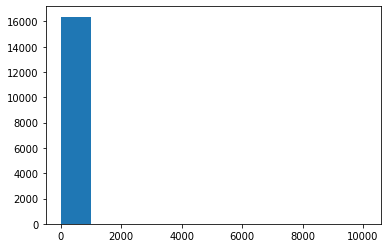

count     16383.000000
mean     119774.307941
std        5609.093416
min      117880.000000
25%      118232.000000
50%      118565.000000
75%      119348.000000
max      270691.000000
Name: f13, dtype: float64
118322    2364
117908    1791
118786     912
117880     636
118570     524
          ... 
132585       1
153895       1
270691       1
119817       1
157301       1
Name: f13, Length: 322, dtype: int64


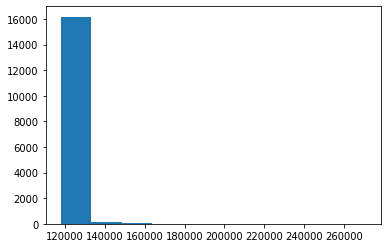

count    16383.000000
mean         0.293940
std          1.728999
min         -7.446045
25%         -0.704562
50%          1.000000
75%          1.000000
max          7.398682
Name: f14, dtype: float64
 1.000000    4741
 0.000000     295
-2.247706       1
-0.029884       1
-0.050286       1
             ... 
-0.311908       1
 3.383083       1
 0.364152       1
-1.061774       1
-1.597424       1
Name: f14, Length: 11349, dtype: int64


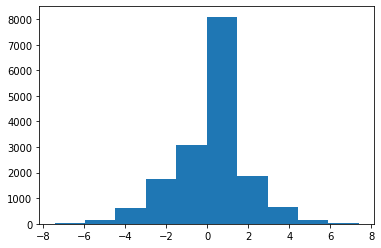

count     16383.000000
mean      25894.316914
std       36086.993946
min          25.000000
25%        4554.000000
50%       13234.000000
75%       38902.000000
max      311696.000000
Name: f15, dtype: float64
770      75
2270     47
2594     45
1350     36
7807     36
         ..
71169     1
28057     1
5665      1
17979     1
2049      1
Name: f15, Length: 3555, dtype: int64


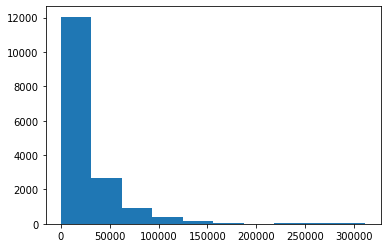

count     16383.000000
mean     119045.099005
std       18321.987129
min        4674.000000
25%      118395.000000
50%      118929.000000
75%      120539.000000
max      286792.000000
Name: f16, dtype: float64
117878    583
117941    415
118514    316
117945    313
119598    280
         ... 
128350      1
129578      1
121574      1
122070      1
126574      1
Name: f16, Length: 432, dtype: int64


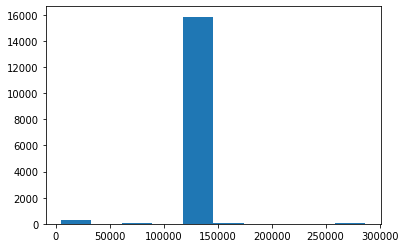

count     16383.000000
mean     184622.040835
std      100590.811845
min        3130.000000
25%      118398.000000
50%      119095.000000
75%      290919.000000
max      308574.000000
Name: f17, dtype: float64
290919    5561
118424    1373
19721     1328
117887    1163
292795     644
          ... 
132725       2
149353       1
123611       1
159679       1
143398       1
Name: f17, Length: 67, dtype: int64


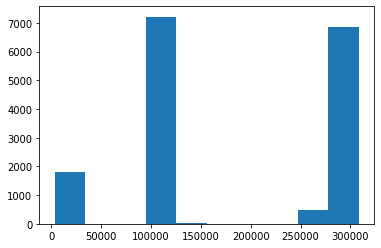

count    16383.000000
mean         1.047305
std          0.306239
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         18.000000
Name: f18, dtype: float64
1     15778
2       505
3        68
4        20
5         5
6         3
7         2
11        1
18        1
Name: f18, dtype: int64


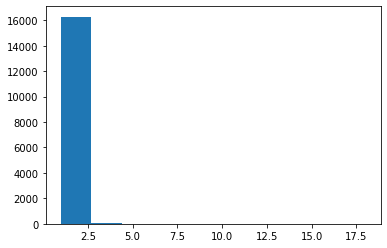

count     16383.000000
mean     125959.667765
std       31091.344158
min      117879.000000
25%      118274.000000
50%      118568.000000
75%      120006.000000
max      311867.000000
Name: f19, dtype: float64
118321    2364
117905    1791
118784     912
117879     636
118568     524
          ... 
130060       1
159677       1
208126       1
123609       1
157359       1
Name: f19, Length: 322, dtype: int64


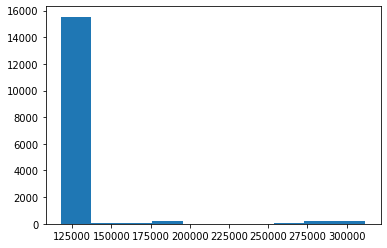

count    16383.000000
mean         1.044558
std          0.262576
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: f20, dtype: float64
1    15801
2      477
3       78
4       16
5        9
7        1
8        1
Name: f20, dtype: int64


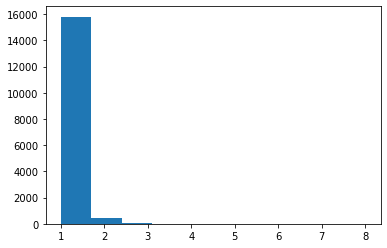

count    16383.000000
mean         1.045718
std          0.266874
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: f21, dtype: float64
1    15775
2      516
3       65
4       14
5        8
7        2
6        2
8        1
Name: f21, dtype: int64


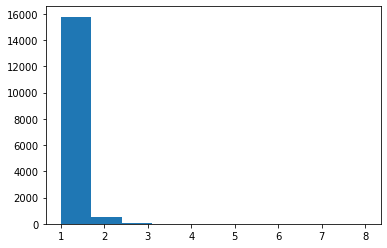

count    16383.000000
mean         1.041934
std          0.246597
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: f22, dtype: float64
1    15816
2      483
3       57
4       21
5        4
7        1
6        1
Name: f22, dtype: int64


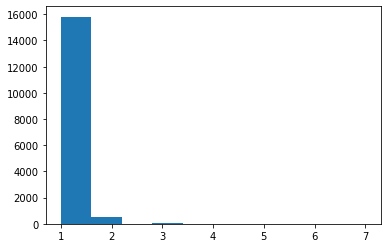

count    1.638300e+04
mean     3.271890e+04
std      3.184929e+06
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      9.000000e+00
max      4.042886e+08
Name: f23, dtype: float64
1        6394
2        2225
3        1195
4         818
5         558
         ... 
2973        1
11161       1
892         1
868         1
1975        1
Name: f23, Length: 906, dtype: int64


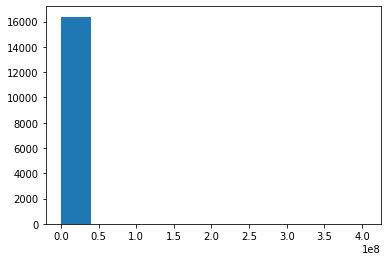

count    16383.000000
mean         1.043948
std          0.259640
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: f24, dtype: float64
1    15798
2      497
3       59
4       16
5       10
6        2
8        1
Name: f24, dtype: int64


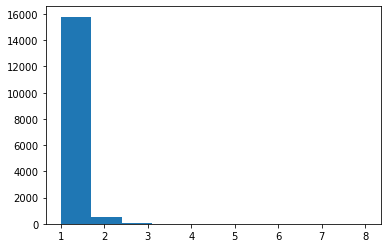

count    16385.000000
mean     24576.000000
std       4730.086416
min      16384.000000
25%      20480.000000
50%      24576.000000
75%      28672.000000
max      32768.000000
Name: Id, dtype: float64
18423    1
20478    1
19132    1
29371    1
31418    1
        ..
30020    1
19779    1
17730    1
23873    1
32768    1
Name: Id, Length: 16385, dtype: int64


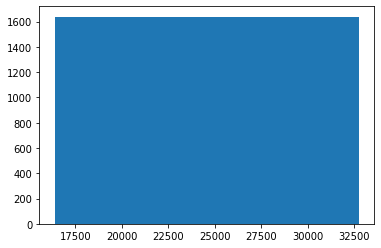

count     16385.000000
mean      42838.465487
std       34729.227527
min          -1.000000
25%       20298.000000
50%       35016.000000
75%       74105.000000
max      312152.000000
Name: f1, dtype: float64
4674      408
79091     244
3852      220
25992     210
75077     204
         ... 
113571      1
3703        1
40549       1
43769       1
94194       1
Name: f1, Length: 5141, dtype: int64


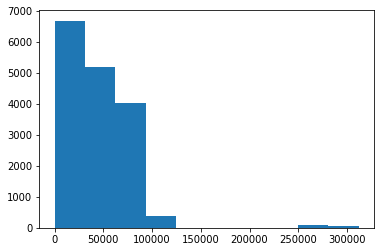

count    16385.000000
mean         1.040647
std          0.266649
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: f2, dtype: float64
1     15839
2       467
3        58
4        16
5         2
7         1
6         1
17        1
Name: f2, dtype: int64


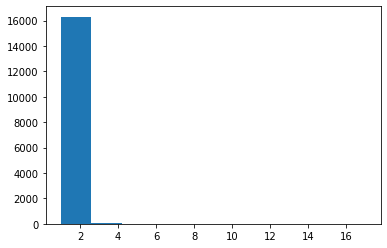

count    16385.000000
mean        10.995173
std        164.062524
min          1.770000
25%          1.770000
50%          1.770000
75%          3.540000
max      14444.970000
Name: f3, dtype: float64
1.77       9988
3.54       2440
5.31       1094
7.08        636
8.85        399
           ... 
486.75        1
354.00        1
1821.33       1
185.85        1
214.17        1
Name: f3, Length: 169, dtype: int64


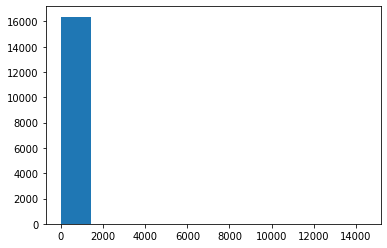

count     16385.000000
mean     118280.067623
std        4585.040697
min       23779.000000
25%      118102.000000
50%      118300.000000
75%      118386.000000
max      176316.000000
Name: f4, dtype: float64
118300    2210
118343    1943
118327    1312
118225    1265
118386     901
          ... 
176316       1
140550       1
118775       1
124157       1
120355       1
Name: f4, Length: 170, dtype: int64


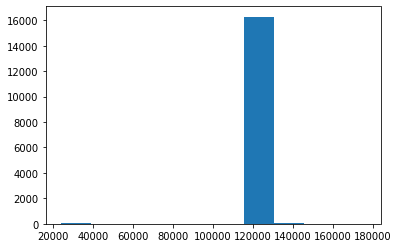

count    16385.000000
mean         1.046445
std          0.287650
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: f5, dtype: float64
1     15798
2       476
3        81
4        14
5         9
6         4
12        1
9         1
7         1
Name: f5, dtype: int64


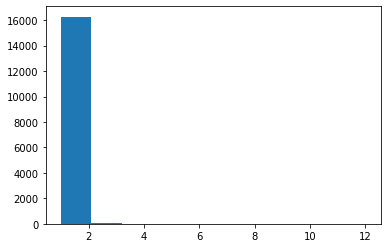

count    16385.000000
mean         0.045468
std          0.326552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: f6, dtype: float64
0     15800
1       499
2        59
3        13
4         8
8         2
6         2
24        1
5         1
Name: f6, dtype: int64


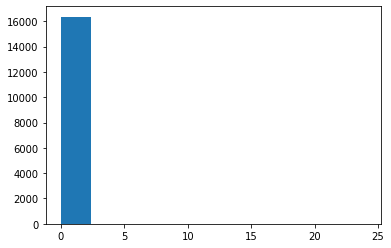

count     16385.000000
mean     116815.536649
std       11455.865265
min        4292.000000
25%      117961.000000
50%      117961.000000
75%      117961.000000
max      247952.000000
Name: f7, dtype: float64
117961    10650
117902      374
91261       363
118315      244
118212      214
          ...  
121411        1
120354        1
216705        1
203209        1
118774        1
Name: f7, Length: 125, dtype: int64


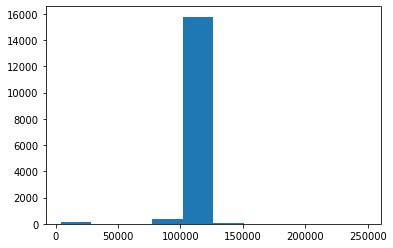

count     16385.000000
mean     170629.642600
std       69622.222738
min        4673.000000
25%      117913.000000
50%      129238.000000
75%      236007.000000
max      311867.000000
Name: f8, dtype: float64
117906    3387
240983     626
117913     341
279443     333
117886     243
          ... 
223110       1
169944       1
122849       1
157686       1
247799       1
Name: f8, Length: 1909, dtype: int64


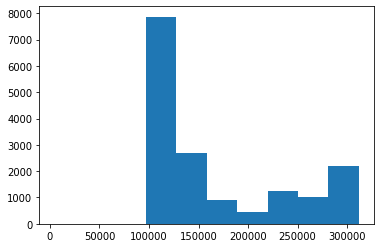

count    16385.000000
mean         1.044248
std          0.268018
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: f9, dtype: float64
1     15801
2       490
3        68
4        19
6         2
5         2
10        1
9         1
8         1
Name: f9, dtype: int64


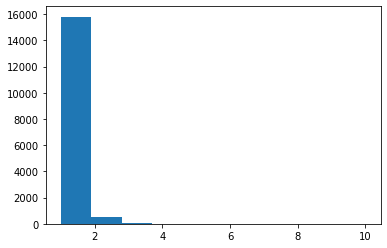

count    16385.000000
mean         6.279158
std        118.584873
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      10002.000000
Name: f10, dtype: float64
0       9807
1       2589
2       1164
3        609
4        391
        ... 
232        1
520        1
680        1
1304       1
847        1
Name: f10, Length: 199, dtype: int64


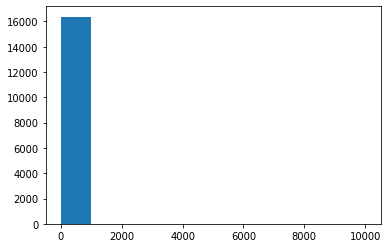

count    16385.000000
mean         1.044614
std          0.257977
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: f11, dtype: float64
1    15788
2      496
3       84
4        8
5        6
8        2
6        1
Name: f11, dtype: int64


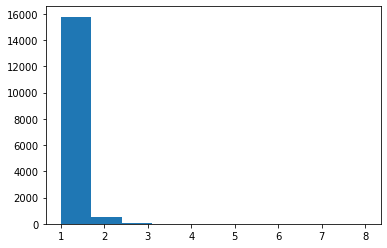

count     16385.000000
mean         50.585780
std        5257.538072
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      672095.000000
Name: f12, dtype: float64
1       10044
2        2476
3        1073
4         604
5         394
        ...  
584         1
3177        1
169         1
185         1
695         1
Name: f12, Length: 179, dtype: int64


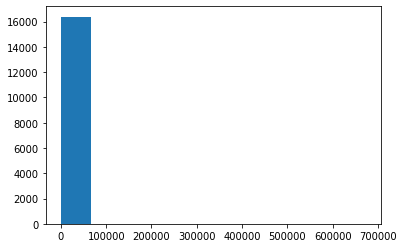

count     16385.000000
mean     119804.611718
std        5954.584576
min      117880.000000
25%      118232.000000
50%      118570.000000
75%      119348.000000
max      268610.000000
Name: f13, dtype: float64
118322    2285
117908    1792
118786     859
117880     620
118570     519
          ... 
131338       1
268610       1
240105       1
153249       1
126420       1
Name: f13, Length: 313, dtype: int64


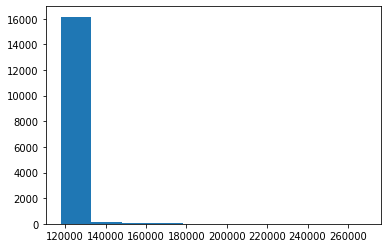

count    16385.000000
mean         0.285666
std          1.731892
min         -7.755142
25%         -0.722395
50%          1.000000
75%          1.000000
max          8.561341
Name: f14, dtype: float64
 1.000000    4662
 0.000000     302
-0.207779       1
 1.115449       1
-0.933231       1
             ... 
-2.547335       1
 1.757669       1
 1.401651       1
-4.056637       1
 0.683680       1
Name: f14, Length: 11423, dtype: int64


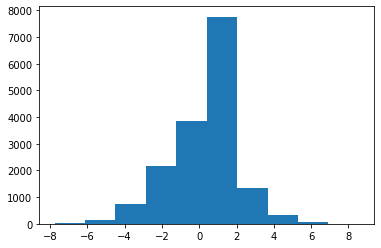

count     16385.000000
mean      26084.716448
std       35770.039723
min          25.000000
25%        4571.000000
50%       13822.000000
75%       44038.000000
max      311696.000000
Name: f15, dtype: float64
770       77
2270      52
16850     40
2594      37
1350      35
          ..
84129      1
118962     1
51393      1
20690      1
2049       1
Name: f15, Length: 3586, dtype: int64


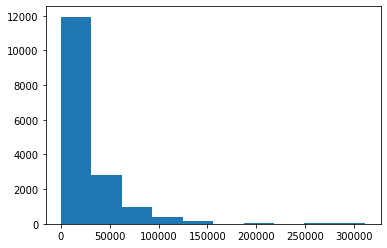

count     16385.000000
mean     118780.460604
std       19579.945823
min        4674.000000
25%      118391.000000
50%      118911.000000
75%      120526.000000
max      277693.000000
Name: f16, dtype: float64
117878    552
117941    348
117945    346
117920    320
118514    285
         ... 
126574      1
122722      1
121030      1
204054      1
272283      1
Name: f16, Length: 422, dtype: int64


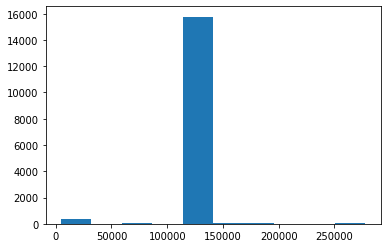

count     16385.000000
mean     182778.345560
std      100380.090423
min        3130.000000
25%      118363.000000
50%      118960.000000
75%      290919.000000
max      308574.000000
Name: f17, dtype: float64
290919    5418
118424    1317
19721     1308
117887    1237
292795     674
          ... 
123689       1
254395       1
127957       1
149353       1
136398       1
Name: f17, Length: 65, dtype: int64


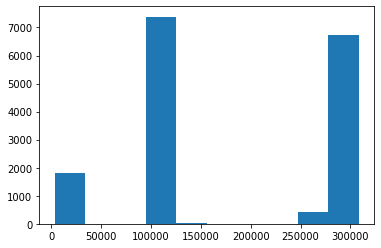

count    16385.000000
mean         1.049252
std          0.282900
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: f18, dtype: float64
1     15745
2       529
3        78
4        20
5         9
6         2
11        1
7         1
Name: f18, dtype: int64


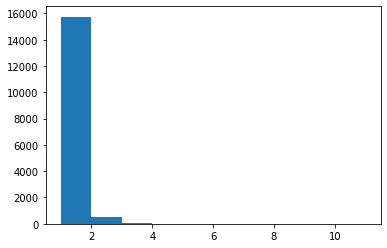

count     16385.000000
mean     125873.078120
std       30983.284017
min      117879.000000
25%      118274.000000
50%      118568.000000
75%      120006.000000
max      311867.000000
Name: f19, dtype: float64
118321    2285
117905    1792
118784     859
117879     620
118568     519
          ... 
279482       1
126418       1
239003       1
127955       1
153248       1
Name: f19, Length: 313, dtype: int64


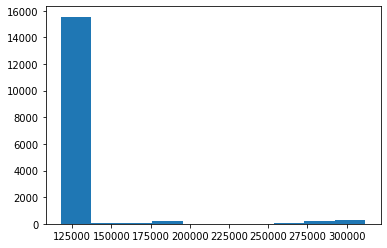

count    16385.000000
mean         1.046872
std          0.264012
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: f20, dtype: float64
1    15758
2      528
3       70
4       22
6        3
5        3
8        1
Name: f20, dtype: int64


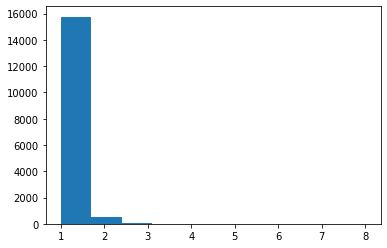

count    16385.000000
mean         1.041379
std          0.263542
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: f21, dtype: float64
1     15844
2       457
3        53
4        19
5         9
12        1
7         1
6         1
Name: f21, dtype: int64


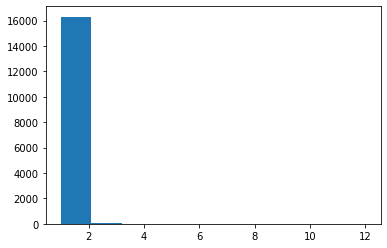

count    16385.000000
mean         1.040525
std          0.233735
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: f22, dtype: float64
1    15822
2      484
3       63
4       10
5        6
Name: f22, dtype: int64


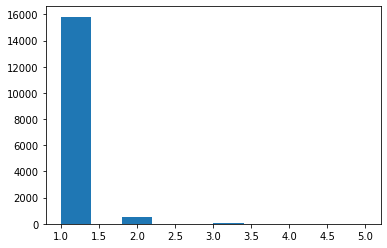

count    1.638500e+04
mean     1.185108e+04
std      7.010728e+05
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      9.000000e+00
max      6.092627e+07
Name: f23, dtype: float64
1         6295
2         2237
3         1200
4          848
5          536
          ... 
169          1
10220        1
208813       1
1912         1
1271         1
Name: f23, Length: 866, dtype: int64


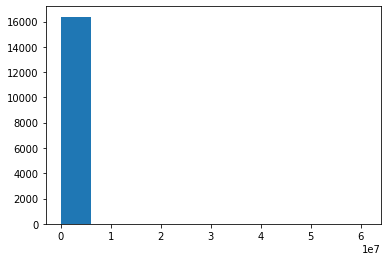

count    16385.000000
mean         1.042417
std          0.274831
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: f24, dtype: float64
1     15821
2       490
3        45
4        16
5         8
6         4
16        1
Name: f24, dtype: int64


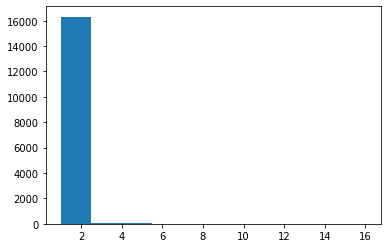

count    16385.000000
mean         0.980836
std          0.137105
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64
1.0    16071
0.0      314
Name: Y, dtype: int64


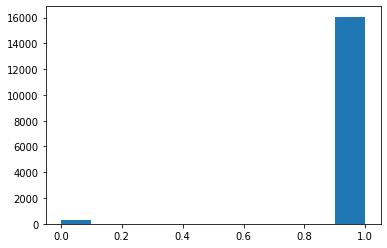

In [68]:
import matplotlib.pyplot as plt

def describe_df(df, key):

  print(df[key].describe())
  print(df[key].value_counts())
  plt.hist(df[key])
  plt.show()

  
for key in train_final.columns:
  describe_df(train_final, key)
for key in test_final.columns:
  describe_df(test_final, key)  

In [69]:
train_final['f3'] = train_final['f3'].apply(np.ceil) 
test_final['f3'] = test_final['f3'].apply(np.ceil) 
train_final['f3']  = train_final['f3'].astype(int)
test_final['f3']  = test_final['f3'].astype(int)

In [ ]:
train_final

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,16379,1,33328,1,1.77,118343,1,0,117961,117906,1,0,1,1,118322,1.000000,4533,118700,290919,1,118321,1,1,1,1,1
16379,16380,1,19944,1,1.77,118225,1,0,117961,132097,1,0,1,20,132098,1.000000,4663,120323,119095,3,132096,1,1,1,8,1
16380,16381,1,28359,1,3.54,118327,1,0,117961,174445,1,2,1,2,132694,1.806069,7822,118492,270488,1,132692,1,2,1,1,1
16381,16382,1,7542,1,3.54,118343,1,0,117961,117906,1,0,1,1,118786,-1.245079,6257,120722,290919,1,118784,1,1,1,12,1


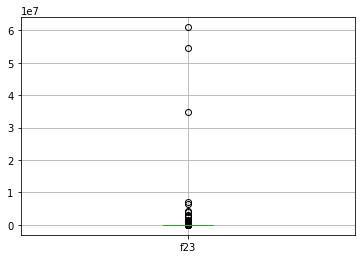

In [70]:
boxplot = test_final.boxplot(column=['f23'])

In [71]:
test_final[test_final['f23']<= 9].count()/ test_final["f23"].count()

Id     0.75624
f1     0.75624
f2     0.75624
f3     0.75624
f4     0.75624
f5     0.75624
f6     0.75624
f7     0.75624
f8     0.75624
f9     0.75624
f10    0.75624
f11    0.75624
f12    0.75624
f13    0.75624
f14    0.75624
f15    0.75624
f16    0.75624
f17    0.75624
f18    0.75624
f19    0.75624
f20    0.75624
f21    0.75624
f22    0.75624
f23    0.75624
f24    0.75624
Y      0.75624
dtype: float64

In [72]:
test_final['f23'].max()

60926272

75% of the data points of the feature f23 belongs to values [1, 2, 3, 4, 5, 6, 7, 8, 9] . Rest there were sprase  values as large as 60926272. So it might be useful to convert all the values above 9 to a new a category say 10. 

In [73]:
# F1 
train_final['f1'] = np.log(train_final['f1'] + 1 + abs(min(train_final['f1'])))
test_final['f1'] = np.log(test_final['f1'] + 1 + abs(min(test_final['f1'])))
test_final['Y']  = test_final['Y'].astype(int)
# F15 
 
train_final['f15'] = np.log(train_final['f15'] + 1 + abs(min(train_final['f15'])))
test_final['f15'] = np.log(test_final['f15'] + 1 + abs(min(test_final['f15'])))
#f23
train_final.loc[train_final.f23 > 9.0, "f23"] = 10
train_final['f23'].describe()
#f23
test_final.loc[test_final.f23 > 9.0, "f23"] = 10
test_final['f23'].describe()




count    16385.000000
mean         4.249558
std          3.706655
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max         10.000000
Name: f23, dtype: float64

In [75]:
train_final

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,10.161458,1,34,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,7.586296,118450,119184,1,121372,1,1,1,2,1
1,2,1,10.444299,1,11,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,9.642837,117945,292795,1,259173,1,1,1,1,1
2,3,1,10.460958,1,2,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,8.932345,118933,290919,1,118784,1,1,1,1,1
3,4,1,11.301315,1,31,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,8.508959,118458,118331,1,307024,1,1,1,2,1
4,5,1,8.450198,1,2,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,9.536907,142145,4673,1,128230,1,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,16379,1,10.414213,1,2,118343,1,0,117961,117906,1,0,1,1,118322,1.000000,8.424859,118700,290919,1,118321,1,1,1,1,1
16379,16380,1,9.900784,1,2,118225,1,0,117961,132097,1,0,1,20,132098,1.000000,8.452975,120323,119095,3,132096,1,1,1,8,1
16380,16381,1,10.252770,1,4,118327,1,0,117961,174445,1,2,1,2,132694,1.806069,8.968014,118492,270488,1,132692,1,2,1,1,1
16381,16382,1,8.928508,1,4,118343,1,0,117961,117906,1,0,1,1,118786,-1.245079,8.745603,120722,290919,1,118784,1,1,1,10,1


In [ ]:
abs(min(test_final['f1']))

0.0

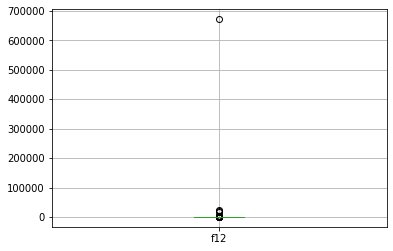

In [ ]:
boxplot = test_final.boxplot(column=['f12'])

In [76]:
result = pd.concat([train_final, test_final])

In [77]:
result

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,10.161458,1,34,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,7.586296,118450,119184,1,121372,1,1,1,2,1
1,2,1,10.444299,1,11,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,9.642837,117945,292795,1,259173,1,1,1,1,1
2,3,1,10.460958,1,2,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,8.932345,118933,290919,1,118784,1,1,1,1,1
3,4,1,11.301315,1,31,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,8.508959,118458,118331,1,307024,1,1,1,2,1
4,5,1,8.450198,1,2,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,9.536907,142145,4673,1,128230,1,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,1,6.880384,1,2,118300,1,0,117961,310997,1,0,1,1,120346,1.000000,8.494948,123055,118424,1,120344,1,1,1,10,1
16381,32765,1,11.569344,1,2,118327,1,0,117961,117906,1,0,1,1,118322,0.580688,10.388472,118320,290919,1,118321,1,1,1,4,1
16382,32766,1,10.671232,1,4,117962,1,0,117961,118368,1,0,1,1,118486,1.000000,7.620705,117904,117887,1,118368,1,1,1,1,1
16383,32767,1,10.348878,1,2,118386,1,0,117961,117906,1,1,1,1,118322,-2.374507,7.150701,118910,290919,1,118321,1,1,1,2,2


290919    10979
118424     2690
19721      2636
117887     2400
292795     1318
          ...  
127957        3
136398        3
132725        2
161100        2
149353        2
Name: f17, Length: 67, dtype: int64
count     32768.000000
mean     183700.136932
std      100488.195184
min        3130.000000
25%      118363.000000
50%      119006.000000
75%      290919.000000
max      308574.000000
Name: f17, dtype: float64
Q1. 118363.0
Q3. 290919.0


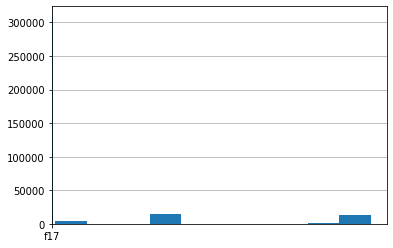

In [78]:
### f4 binninng 

  #categorical

def binning_max_ones_zero_diff(df, key):
  print(df[key].value_counts())
  print(df[key].describe())
  df[key].hist()
  only_zero_train = train_final[train_final['Y']== 0]
  only_ones_train = train_final[train_final['Y']== 1]
  
  if key =='f17':
    bins = np.sort(np.unique(np.concatenate( ([0],[50000], [200000],np.array(only_ones_train[key].describe()[3:]),np.array(only_zero_train[key].describe()[3:]) ))))
  else:
    bins = np.sort(np.unique(np.concatenate( ([0],np.array(only_ones_train[key].describe()[3:]),np.array(only_zero_train[key].describe()[3:]) ))))

  labels_len = bins.size
  #categorical
  #test_final['f3'].hist()
  boxplot = df.boxplot(column=[key])
  # First quartile (Q1)
  Q0 = np.percentile(df[key], 0, interpolation = 'midpoint')

  # First quartile (Q1)
  Q1 = np.percentile(df[key], 25, interpolation = 'midpoint')
  print("Q1. {}".format(Q1))


  # Third quartile (Q3)
  Q3 = np.percentile(df[key], 75, interpolation = 'midpoint')
  print("Q3. {}".format(Q3))
  labels = []
  for len in range(labels_len-1):
    labels.append(key + 'cat'+ str(len))

  #labels = [key + 'small', key + 'medium', key + 'big']
  #bins = [0, Q1, Q3,only_zero_train[key] df[key].max()]
  df[key + 'bins'] = pd.cut(df[key], bins=bins, labels=labels, include_lowest=True)
  df[key + 'bins'] = df[key + 'bins'].astype('category')
  df[key + 'bins_cat']= df[key + 'bins'].cat.codes
  #np.unique(df[key + 'bins_cat'])
  
#keys = ['f3', 'f4', 'f17', 'f10']
keys = ['f17']

for key in keys:
  
  binning_max_ones_zero_diff(result, key)
  result

  result.drop(columns=[key, key + 'bins'], inplace= True)
  '''x = pd.get_dummies(result[key + "bins"])
  result

  result.drop(columns=[key + "bins"], inplace=  True)
  result = pd.concat([result, x], axis=1)'''

In [79]:
col_name = 'f12'
q1 = result[col_name].quantile(0.25)
q3 = result[col_name].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low_f12  = q1-1.5*iqr
fence_high_f12 = q3+1.5*iqr
median_f12 = result[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
result.loc[(result[col_name] > fence_high_f12), col_name] = np.nan

result.fillna(median_f12,inplace=True)
#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']

In [ ]:
'''col_name = 'f12'
q1 = train_final[col_name].quantile(0.25)
q3 = train_final[col_name].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low_f12  = q1-1.5*iqr
fence_high_f12 = q3+1.5*iqr
median = train_final[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
train_final.loc[(train_final[col_name] > fence_high), col_name] = np.nan

train_final.fillna(median,inplace=True)
#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']'''

"col_name = 'f12'\nq1 = train_final[col_name].quantile(0.25)\nq3 = train_final[col_name].quantile(0.75)\niqr = q3-q1 #Interquartile range\nfence_low_f12  = q1-1.5*iqr\nfence_high_f12 = q3+1.5*iqr\nmedian = train_final[col_name].median()\n#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan\ntrain_final.loc[(train_final[col_name] > fence_high), col_name] = np.nan\n\ntrain_final.fillna(median,inplace=True)\n#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']"

In [ ]:
'''col_name = 'f12'
q1 = test_final[col_name].quantile(0.25)
q3 = test_final[col_name].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
median = test_final[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
test_final.loc[(test_final[col_name] > fence_high), col_name] = np.nan

test_final.fillna(median,inplace=True)
#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']'''

"col_name = 'f12'\nq1 = test_final[col_name].quantile(0.25)\nq3 = test_final[col_name].quantile(0.75)\niqr = q3-q1 #Interquartile range\nfence_low  = q1-1.5*iqr\nfence_high = q3+1.5*iqr\nmedian = test_final[col_name].median()\n#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan\ntest_final.loc[(test_final[col_name] > fence_high), col_name] = np.nan\n\ntest_final.fillna(median,inplace=True)\n#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']"

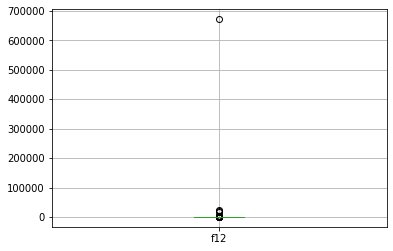

In [ ]:
boxplot = test_final.boxplot(column=['f12'])

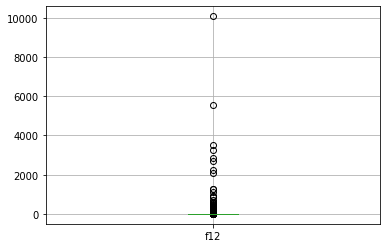

In [ ]:
boxplot = train_final.boxplot(column=['f12'])

In [80]:
 
col_name = 'f10'
q1 = result[col_name].quantile(0.25)
q3 = result[col_name].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low_f10  = q1-1.5*iqr
fence_high_f10 = q3+1.5*iqr
median_f10 = result[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
result.loc[(result[col_name] > fence_high_f10), col_name] = np.nan

result.fillna(median_f10,inplace=True)
#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']

In [ ]:
result

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f18,f19,f20,f21,f22,f23,f24,f17bins_cat
0,1,1,10.161458,1,34,118596,1,0,118595,125738,1,0.0,1,2.0,121374,-2.266430,7.586296,118450,1,121372,1,1,1,2,1,5
1,2,1,10.444299,1,11,118041,1,0,117902,130913,1,1.0,1,1.0,118943,-0.305612,9.642837,117945,1,259173,1,1,1,1,1,8
2,3,1,10.460958,1,2,118327,1,0,117961,124402,1,2.0,1,1.0,118786,2.015561,8.932345,118933,1,118784,1,1,1,1,1,7
3,4,1,11.301315,1,31,118300,1,0,117961,301218,1,0.0,1,1.0,118332,-3.172501,8.508959,118458,1,307024,1,1,1,2,1,3
4,5,1,8.450198,1,2,119921,1,0,119920,302830,1,0.0,1,2.0,128231,0.573767,9.536907,142145,1,128230,1,1,1,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,1,6.880384,1,2,118300,1,0,117961,310997,1,0.0,1,1.0,120346,1.000000,8.494948,123055,1,120344,1,1,1,10,1,4
16381,32765,1,11.569344,1,2,118327,1,0,117961,117906,1,0.0,1,1.0,118322,0.580688,10.388472,118320,1,118321,1,1,1,4,1,7
16382,32766,1,10.671232,1,4,117962,1,0,117961,118368,1,0.0,1,1.0,118486,1.000000,7.620705,117904,1,118368,1,1,1,1,1,2
16383,32767,1,10.348878,1,2,118386,1,0,117961,117906,1,1.0,1,1.0,118322,-2.374507,7.150701,118910,1,118321,1,1,1,2,2,7


In [ ]:
 
'''col_name = 'f10'
q1 = train_final[col_name].quantile(0.25)
q3 = train_final[col_name].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low_f10  = q1-1.5*iqr
fence_high_f10 = q3+1.5*iqr
median = train_final[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
train_final.loc[(train_final[col_name] > fence_high), col_name] = np.nan

train_final.fillna(median,inplace=True)
#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']'''

"col_name = 'f10'\nq1 = train_final[col_name].quantile(0.25)\nq3 = train_final[col_name].quantile(0.75)\niqr = q3-q1 #Interquartile range\nfence_low_f10  = q1-1.5*iqr\nfence_high_f10 = q3+1.5*iqr\nmedian = train_final[col_name].median()\n#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan\ntrain_final.loc[(train_final[col_name] > fence_high), col_name] = np.nan\n\ntrain_final.fillna(median,inplace=True)\n#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']"

In [ ]:
 
'''col_name = 'f10'
q1 = test_final[col_name].quantile(0.25)
q3 = test_final[col_name].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
median = test_final[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
test_final.loc[(test_final[col_name] > fence_high), col_name] = np.nan

test_final.fillna(median,inplace=True)
#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']'''

"col_name = 'f10'\nq1 = test_final[col_name].quantile(0.25)\nq3 = test_final[col_name].quantile(0.75)\niqr = q3-q1 #Interquartile range\nfence_low  = q1-1.5*iqr\nfence_high = q3+1.5*iqr\nmedian = test_final[col_name].median()\n#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan\ntest_final.loc[(test_final[col_name] > fence_high), col_name] = np.nan\n\ntest_final.fillna(median,inplace=True)\n#df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]['Id']"

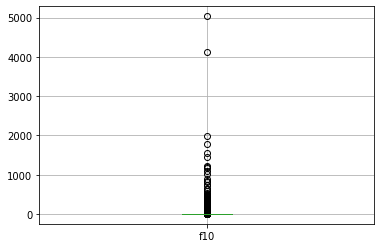

In [ ]:
boxplot = train_final.boxplot(column=['f10'])

In [81]:
import itertools
Y = result['Y']
result.drop(columns= ['Id','Y'], inplace = True)

'''for col_a, col_b in itertools.combinations(result.columns, 2):
    result[col_a + 'x' + col_b] = result[col_a] * result[col_b]'''

"for col_a, col_b in itertools.combinations(result.columns, 2):\n    result[col_a + 'x' + col_b] = result[col_a] * result[col_b]"

In [82]:
X = result

In [ ]:

...
# create an xgboost regression model
from xgboost import XGBRegressor
'''X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25)
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4], 'n_estimators': [100, 500, 1000]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.2, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(XGBRegressor(**fix_params), cv_params, scoring = 'f1', verbose = 1, cv = 5)

csv.fit(X_train, y_train)
y_pred = csv.predict(X_test)
roc_score = roc_auc_score(y_test, y_pred)'''






"X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25)\ncv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4], 'n_estimators': [100, 500, 1000]}    # parameters to be tries in the grid search\nfix_params = {'learning_rate': 0.2, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment \ncsv = GridSearchCV(XGBRegressor(**fix_params), cv_params, scoring = 'f1', verbose = 1, cv = 5)\n\ncsv.fit(X_train, y_train)\ny_pred = csv.predict(X_test)\nroc_score = roc_auc_score(y_test, y_pred)"

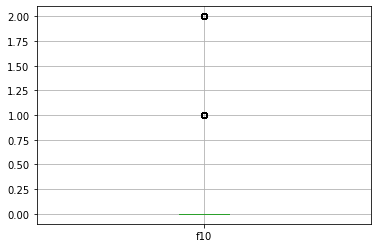

In [83]:
boxplot = X.boxplot(column=['f10'])


290919    5418
118424    1317
19721     1308
117887    1237
292795     674
          ... 
123689       1
254395       1
127957       1
149353       1
136398       1
Name: f17, Length: 65, dtype: int64
count     16385.000000
mean     182778.345560
std      100380.090423
min        3130.000000
25%      118363.000000
50%      118960.000000
75%      290919.000000
max      308574.000000
Name: f17, dtype: float64
Q1. 118363.0
Q3. 290919.0
1000
1
0
Fold: 1,, roc: 0.915
1
Fold: 2,, roc: 0.835
2
Fold: 3,, roc: 0.904
3
Fold: 4,, roc: 0.887
4
Fold: 5,, roc: 0.865
5
Fold: 6,, roc: 0.843
6
Fold: 7,, roc: 0.892
7
Fold: 8,, roc: 0.923
8
Fold: 9,, roc: 1.000
9
Fold: 10,, roc: 1.000
mean 0.9063024084499449


'Fold: 1,, roc: 0.911\n1\nFold: 2,, roc: 0.820\n2\nFold: 3,, roc: 0.900\n3\nFold: 4,, roc: 0.889\n4\nFold: 5,, roc: 0.870\n5\nFold: 6,, roc: 0.848\n6\nFold: 7,, roc: 0.894\n7\nFold: 8,, roc: 0.905\n8\nFold: 9,, roc: 0.999\n9\nFold: 10,, roc: 1.000\nmean 0.9037391934508884\n\nmean 0.9062186713472851\n\nmean 0.9077905247182263\n\nmean 0.9072127041644993\n\n0.04 :: mean 0.9044749858202863\n16 :: mean 0.9030367353105108\n\n'

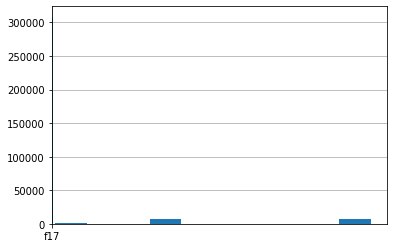

In [84]:
# Create a Stratified K-Fold;
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import roc_auc_score

#n_estimators=1000
import pickle

test_final = pd.read_csv('test_final.csv')
test_final['f3']  = test_final['f3'].astype(int)
# F1 
test_final['f1'] = np.log(test_final['f1'] + 1 + abs(min(test_final['f1'])))
# F15 
 
test_final['f15'] = np.log(test_final['f15'] + 1 + abs(min(test_final['f15'])))

#f23
test_final.loc[test_final.f23 > 9.0, "f23"] = 10
test_final['f23'].describe()


col_name = 'f10'
median_f10 = test_final[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
test_final.loc[(test_final[col_name] > fence_high_f10), col_name] = np.nan

test_final.fillna(median_f10,inplace=True)
col_name = 'f12'
median_f12 = test_final[col_name].median()
#df_in.loc[(df_in[col_name] < fence_low), col_name] = np.nan
test_final.loc[(test_final[col_name] > fence_high_f12), col_name] = np.nan

test_final.fillna(median_f12,inplace=True)
key = 'f17'
binning_max_ones_zero_diff(test_final, key)
test_final.drop(columns=[key, key + 'bins'], inplace= True)


#df

test_cat = test_final
test_data_id_dropped_cat = test_cat.drop(columns = ['Id'])
sample = pd.read_csv('sample-submission.csv')
pred = pd.DataFrame()



n_estimators_list = [1000]
scale_pos_weight_list = [1]

for estimator in n_estimators_list:
  for scal_pos in scale_pos_weight_list:
    print(estimator)
    print(scal_pos)
    kfold = StratifiedKFold(n_splits=10,
    random_state=None).split(X, Y)
    roc_scores_mean = []
    scores = []
    roc_scores = []

    
    for k, (train, test) in enumerate(kfold):
      print(k)     
      xgb_model = xgb.XGBClassifier(n_estimators=estimator, scale_pos_weight=scal_pos)


      xgb_model.fit(X.iloc[train], Y.iloc[train])
      file_name = "model" +str(k) + str(estimator) + "_" + str(scal_pos)+ ".pkl"

      # save
      pickle.dump(xgb_model, open(file_name, "wb"))
      y_pred = xgb_model.predict_proba(test_data_id_dropped_cat)
      y_pred_one_minus = 1- y_pred
      #print(y_pred_one_minus.shape)
      #pred["pred" + str(i)] = y_pred[:, 1]
      pred["pred" + str(k)] = y_pred_one_minus[:, 0]



      roc_score = roc_auc_score(Y.iloc[test], xgb_model.predict_proba(X.iloc[test])[:, 1])
      #roc_score = roc_auc_score(y_train.iloc[test], np.mean(xgb_model.predict_proba(X_train.iloc[test])[:, 1], )

      roc_scores.append(roc_score)

      #print('Fold: %s,, Acc: %.3f' % (k+1, score))
      print('Fold: %s,, roc: %.3f' % (k+1, roc_score))
    print("mean {}".format(np.mean(roc_scores)))
pred['Y'] = pred.mean(axis=1)
pred['Id'] = test_final['Id']
pred.drop(columns=["pred0", "pred1", "pred2", "pred3","pred4","pred5","pred6","pred7", "pred8", "pred9"], inplace=True)
pred.to_csv("predictions_final.csv")
#pred.to_csv("predictions.csv")

'''Fold: 1,, roc: 0.911
1
Fold: 2,, roc: 0.820
2
Fold: 3,, roc: 0.900
3
Fold: 4,, roc: 0.889
4
Fold: 5,, roc: 0.870
5
Fold: 6,, roc: 0.848
6
Fold: 7,, roc: 0.894
7
Fold: 8,, roc: 0.905
8
Fold: 9,, roc: 0.999
9
Fold: 10,, roc: 1.000
mean 0.9037391934508884

mean 0.9062186713472851

mean 0.9077905247182263

mean 0.9072127041644993

0.04 :: mean 0.9044749858202863
16 :: mean 0.9030367353105108

'''
  

In [ ]:
test_final

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f17bins,f17bins_cat
0,16384,10.538343,1,1,118603,1,0,118602,118097,1,0.0,1,1.0,117888,2.453740,9.540148,117941,117887,1,117885,1,1,1,1,1,f17cat2,2
1,16385,12.651178,1,3,118052,1,0,117961,290919,1,0.0,1,1.0,118322,-0.012317,9.593151,118992,290919,1,118321,1,1,1,7,1,f17cat7,7
2,16386,10.122061,1,23,118300,1,0,117961,302830,1,0.0,1,1.0,128231,1.000000,6.679599,119181,4673,1,128230,1,1,1,10,1,f17cat1,1
3,16387,8.450198,1,1,119091,1,0,119062,118036,1,0.0,1,1.0,117908,1.000000,9.727824,143531,290919,1,117905,1,1,1,10,1,f17cat7,7
4,16388,11.137897,1,3,118300,1,0,117961,171056,1,0.0,1,1.0,118639,-0.503250,8.511376,118360,118638,1,118636,1,1,1,1,1,f17cat4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,6.880384,1,1,118300,1,0,117961,310997,1,0.0,1,1.0,120346,1.000000,8.494948,123055,118424,1,120344,1,1,1,10,1,f17cat4,4
16381,32765,11.569344,1,1,118327,1,0,117961,117906,1,0.0,1,1.0,118322,0.580688,10.388472,118320,290919,1,118321,1,1,1,4,1,f17cat7,7
16382,32766,10.671232,1,3,117962,1,0,117961,118368,1,0.0,1,1.0,118486,1.000000,7.620705,117904,117887,1,118368,1,1,1,1,1,f17cat2,2
16383,32767,10.348878,1,1,118386,1,0,117961,117906,1,1.0,1,1.0,118322,-2.374507,7.150701,118910,290919,1,118321,1,1,1,2,2,f17cat7,7


In [ ]:
X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f18,f19,f20,f21,f22,f23,f24,f17bins_cat
0,10.161458,1,34,118596,1,0,118595,125738,1,0.0,1,2.0,121374,-2.266430,7.586296,118450,1,121372,1,1,1,2,1,5
1,10.444299,1,11,118041,1,0,117902,130913,1,1.0,1,1.0,118943,-0.305612,9.642837,117945,1,259173,1,1,1,1,1,8
2,10.460958,1,2,118327,1,0,117961,124402,1,2.0,1,1.0,118786,2.015561,8.932345,118933,1,118784,1,1,1,1,1,7
3,11.301315,1,31,118300,1,0,117961,301218,1,0.0,1,1.0,118332,-3.172501,8.508959,118458,1,307024,1,1,1,2,1,3
4,8.450198,1,2,119921,1,0,119920,302830,1,0.0,1,2.0,128231,0.573767,9.536907,142145,1,128230,1,1,1,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,6.880384,1,2,118300,1,0,117961,310997,1,0.0,1,1.0,120346,1.000000,8.494948,123055,1,120344,1,1,1,10,1,4
16381,11.569344,1,2,118327,1,0,117961,117906,1,0.0,1,1.0,118322,0.580688,10.388472,118320,1,118321,1,1,1,4,1,7
16382,10.671232,1,4,117962,1,0,117961,118368,1,0.0,1,1.0,118486,1.000000,7.620705,117904,1,118368,1,1,1,1,1,2
16383,10.348878,1,2,118386,1,0,117961,117906,1,1.0,1,1.0,118322,-2.374507,7.150701,118910,1,118321,1,1,1,2,2,7


In [ ]:
n_estimators_list = [100, 200, 500, 700, 800, 1000, 1500, 2000, 3000, 4000]
scale_pos_weight_list = [0.04, 0.05, 0.06, 16]

for estimator in n_estimators_list:
  for scal_pos in scale_pos_weight_list:
    print(str(estimator))
    print(str(scal_pos))

 

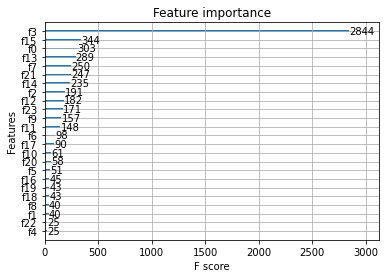

In [ ]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(xgb_model)
plt.show()